# Medical Insurance Charges Prediction using Linear Regression

This project aims to predict medical insurance charges using basic demographic and health-related features.
We use **Linear Regression**, a fundamental machine learning algorithm, to model the relationship between the dependent variable (`charges`) and independent variables like age, BMI, smoking status, etc.

### Objectives:
- Understand the dataset structure and features.
- Perform Exploratory Data Analysis (EDA).
- Prepare the data using preprocessing pipelines.
- Train and evaluate a Linear Regression model.
- Visualize the model performance.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [12]:
# Load the dataset
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)
We explore the dataset to understand feature distributions, detect patterns, and spot potential outliers or correlations.

In [13]:
# Display summary statistics of numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# Check for missing values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

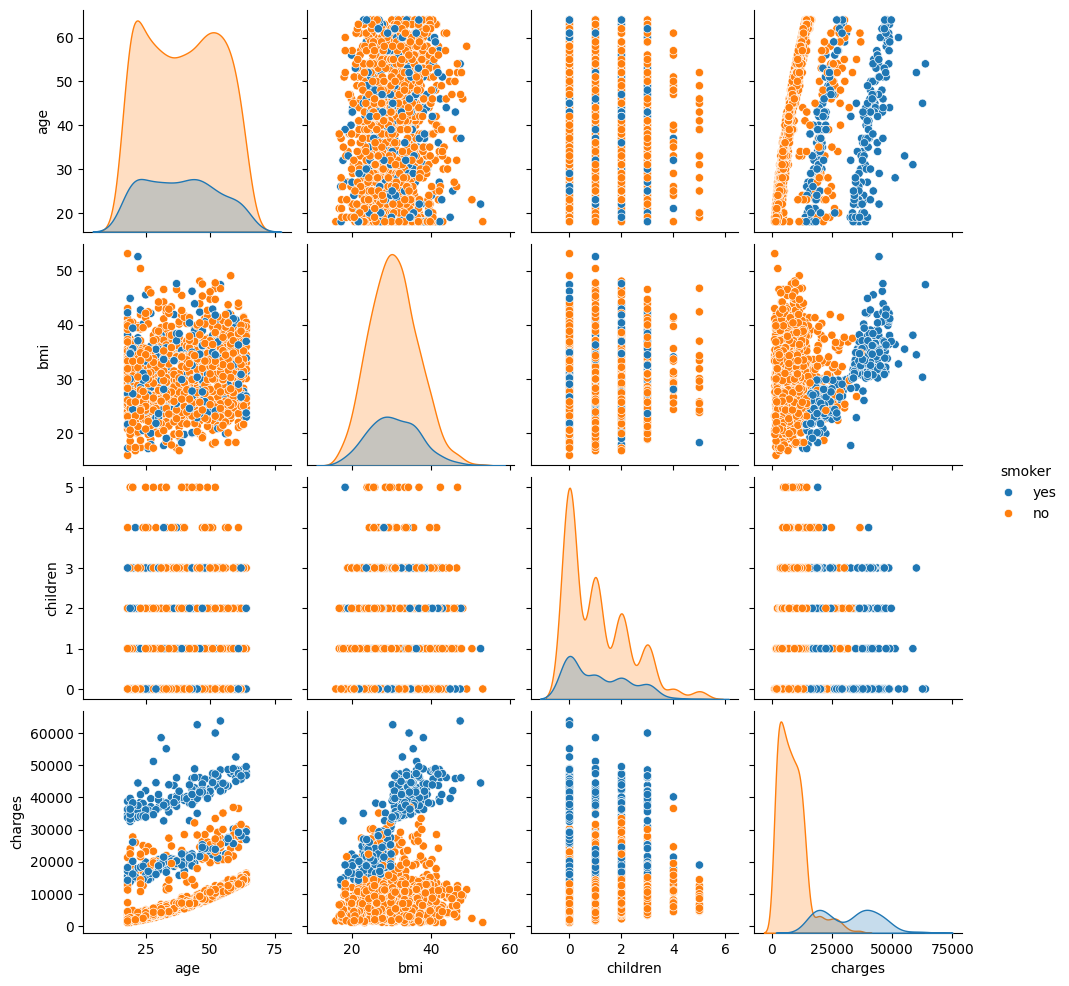

In [15]:
# Visualize relationships and distributions across features using pairplot
sns.pairplot(df, hue='smoker')
plt.show()

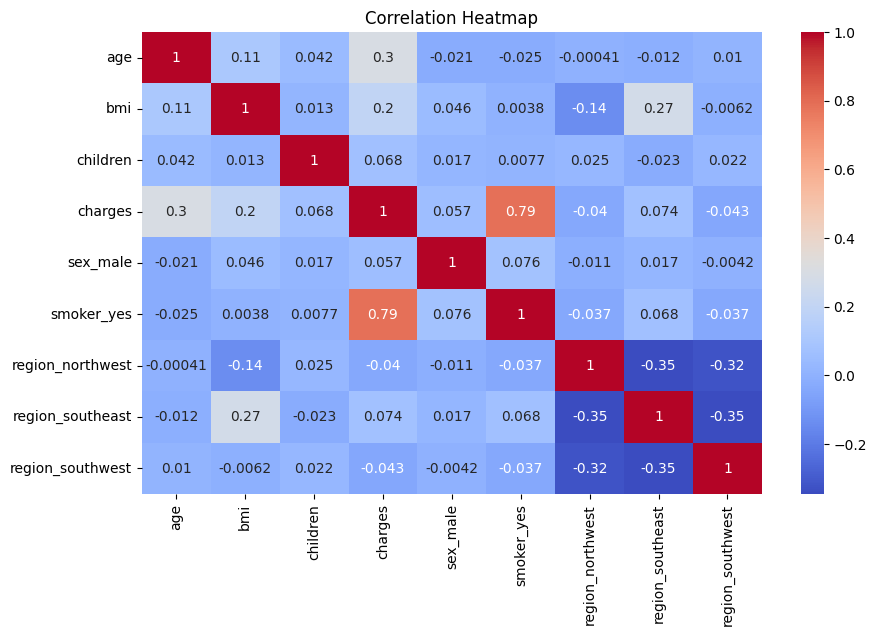

In [16]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing and Model Building
We encode categorical features, scale numerical ones, and build a pipeline for training a linear regression model.

In [17]:
# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [18]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [19]:
# Create a column transformer for preprocessing:
# - OneHotEncode categorical columns
# - Standardize numerical columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Build a pipeline combining preprocessing and Linear Regression model
linreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to training data
linreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg_pipeline.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 33596915.85
R² Score: 0.78


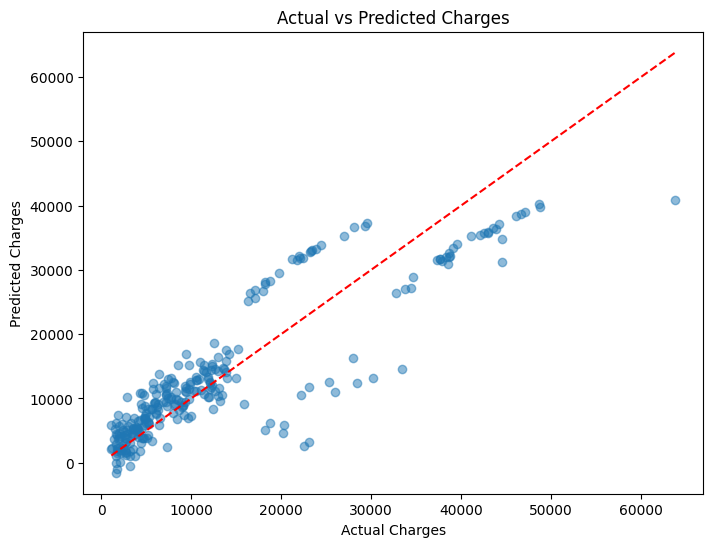

In [22]:
# Plot predicted vs actual charges
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()